<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [8]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**



In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
#dataframe 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
corr = df.corr()

#price와 다른 특성간의 상관계수 확인
corr_price = corr.loc[['price']]

#price와 price간의 상관계수는 제거
corr_price = corr_price.drop('price',axis=1)

corr_price

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.016762,0.30835,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447


In [12]:
#상관계수가 가장 높은 특성 찾기 
col = corr_price.columns[corr_price.max().argmax()]

print(col)

sqft_living


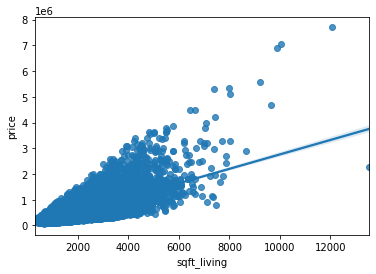

In [13]:
import seaborn as sns

#시각화 
sns.regplot(x=col,y='price',data=df);

### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

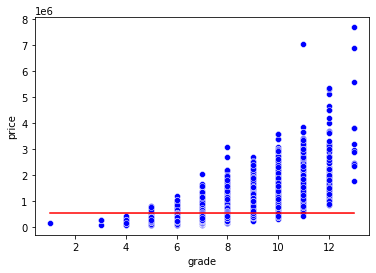

In [14]:
x = df['grade']
y = df['price']

predict = df['price'].mean()
errors = predict - df['price']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x = x,y = predict, color = 'red')
sns.scatterplot(x = x , y = y , color ='blue');

### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

In [15]:
from sklearn.linear_model import LinearRegression

#예측모델 객체 생성
model = LinearRegression()

#모델 학습 
model.fit(df[['grade']],df[['price']])

#모델 예측
X_test = [[6]]
y_pred = model.predict(X_test)

print(f'grade가 {X_test[0][0]}인 주택의 가격은 ${int(y_pred)}입니다.')

grade가 6인 주택의 가격은 $194700입니다.


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

'grade가 7인  주택 가격 예측: $403157 (1 grade당 추가금: $208457)'

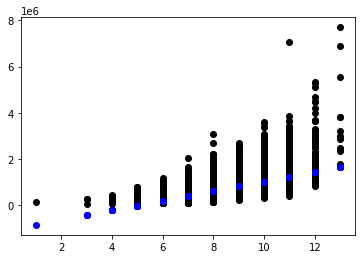

In [16]:
import matplotlib.pyplot as plt

X_test = [[x] for x in df['grade']]
y_pred = model.predict(X_test)

# train 데이터에 대한 그래프
plt.scatter(df[['grade']], df[['price']], color='black', linewidth=1)

# model이 예측한 데이터 그래프
plt.scatter(X_test, y_pred, color='blue', linewidth=1);


def explain_prediction(grade):
    y_pred = model.predict([[grade]])
    pred = f"grade가 {grade}인  주택 가격 예측: ${int(y_pred[0])} (1 grade당 추가금: ${int(model.coef_[0])})"
    return pred

explain_prediction(7)

### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [17]:
# 예측모델 객체 생성  -> 두 모델을 비교하라는 것이 무슨 의미이지? R2, p-value, t-test, coef - 이 4가지 비교 -> 회귀계수를 기준으로 비교하면 될 듯
## R^2, p-value, (t-test: 연구 or 리서치에서 주로 사용), 계수(beta: 기울기) / regression context에서는 베타는 기울기! 
model_sqft = LinearRegression()

feature = ['sqft_living']
target = ['price']

X_train = df[feature]
y_train = df[target]

# model 학습 
model_sqft.fit(X_train,y_train)

def explain_prediction(sqft):
    y_pred = model_sqft.predict([[sqft]])
    pred = f"{int(sqft)} sqft 주택 가격 예측: ${int(y_pred[0])} (1 sqft당 추가금: ${int(model_sqft.coef_[0])})"
    return pred

explain_prediction(4000)

## grade를 특성으로 사용해서 만든 모델과 sqft_living을 특성으로 사용해서 만든 모델을 회귀계수를 기준으로 비교해보면, grade를 특성으로 사용해서 만든 모델이 기울기가 더 큰 것을 볼 수 있다.
## 즉 설명력을 기준으로 바라보았을 때 기울기가 더 큰 것이 설명력이 더 좋다고 볼 수 있으므로 grade를 특성으로 사용해서 만든 모델이 설명력이 더 좋다고 할 수 있다. 

'4000 sqft 주택 가격 예측: $1078913 (1 sqft당 추가금: $280)'

## 🔥도전과제

## 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

1. 독립변수는 동일한 분산을 가져야 한다.
2. 독립변수와 종속변수는 선형관계에 있어야 한다.
3. 평균이 0이고 분산이 시그마제곱인 정규성을 가져야 한다. 
4. 회귀모델인 경우, continuous 변수를 사용한다.

## 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.  

**OLS(Ordinary Least Square)란**, 간단히 이해하면 최소값을 찾는 것이다. 여기서 중요한 것은 어떤 값의 최솟값을 찾으려고 하는지이다. 

우리는 단순선형회귀모델을 만들고 해당 모델의 계수와 절편을 통해 회귀직선을 알 수 있다. 우리가 최종적으로 원하는 선형모델은 실제값과 예측값간의 차이가 최소화되는 것을 원한다. 그래서 구한 **회귀직선과 실제값간의 거리가 최소화**되는 회귀직선을 찾기 위해 우리는 데이터를 이용해 **학습**이라는 것을 진행한다.

위에서 언급한 회귀직선과 실제값간의 거리를 우리는 에러 또는 잔차라고 부른다. 이러한 잔차가 최소화되는 선이 무엇인지를 찾기 위해 우리는 OLS를 사용한다. 즉, 모든 실제 데이터와 회귀직선간의 거리의 제곱의 합이 **제일 작아**지는 그 때의 회귀직선을 우리는 구하려고 하는 것이고 이 때 우리는 **OLS라는 방법**을 사용하게 된다.